In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [60]:
df=pd.read_csv('Cricket_Every_T20i_International_Innings.csv')
df.head()

,Match_ID,Player_Name,Team,Opposition,Runs,NotOut,Mins,BF,4s,6s,SR,Inns,Ground,Start Date,Match_Winner,Margin
0,T20I # 1652,RW Chakabva,Zimbabwe,U.S.A.,31,0.0,-,23,4,1,134.78,1,Bulawayo,14-Jul-22,Zimbabwe,46 runs
1,T20I # 1652,CR Ervine,Zimbabwe,U.S.A.,11,0.0,-,9,2,0,122.22,1,Bulawayo,14-Jul-22,Zimbabwe,46 runs
2,T20I # 1652,SC Williams,Zimbabwe,U.S.A.,37,0.0,-,35,3,0,105.71,1,Bulawayo,14-Jul-22,Zimbabwe,46 runs
3,T20I # 1652,I Kaia,Zimbabwe,U.S.A.,2,0.0,-,5,0,0,40,1,Bulawayo,14-Jul-22,Zimbabwe,46 runs
4,T20I # 1652,Sikandar Raza,Zimbabwe,U.S.A.,82*,1.0,-,40,7,5,205,1,Bulawayo,14-Jul-22,Zimbabwe,46 runs


Total Number of Unique players

In [61]:
#Unique_players=list(df['Player_Name'].unique())
#Unique_players
Unique_players_count=df['Player_Name'].nunique()
Unique_players_count


2886

Total Teams

In [62]:
Team_list = df['Team'].to_list()
Opposition_list2 = df['Opposition'].to_list()
list = Team_list + Opposition_list2
Total_teams = []
count = 0
for i in list:
    if i not in Total_teams:
        count += 1
        Total_teams.append(i)
print("No of unique items are:", count)

print(Total_teams)

No of unique items are: 91
['Zimbabwe', 'U.S.A.', 'Jersey', 'Singapore', 'Netherlands', 'Uganda', 'P.N.G.', 'Hong Kong', 'Isle of Man', 'Serbia', 'Finland', 'Italy', 'Cyprus', 'Romania', 'Croatia', 'Sweden', 'Turkey', 'Greece', 'Bhutan', 'Malaysia', 'England', 'India', 'Austria', 'Czech Rep.', 'Luxembourg', 'Bulgaria', 'Thailand', 'Maldives', 'Bangladesh', 'West Indies', 'Portugal', 'Denmark', 'Spain', 'Belgium', 'Gibraltar', 'Malta', 'Israel', 'Hungary', 'Ireland', 'South Africa', 'Estonia', 'Afghanistan', 'Germany', 'Australia', 'Sri Lanka', 'Switzerland', 'Namibia', 'Guernsey', 'Norway', 'Cayman Is', 'Bahamas', 'Pakistan', 'Nepal', 'Oman', 'U.A.E.', 'Philippines', 'Bahrain', 'Canada', 'New Zealand', 'Tanzania', 'Nigeria', 'Kenya', 'Argentina', 'Bermuda', 'Panama', 'Belize', 'Scotland', 'Botswana', 'Cameroon', 'Sierra Leone', 'Mozambique', 'Kuwait', 'Qatar', 'Saudi Arabia', 'Seychelles', 'Malawi', 'Rwanda', 'Lesotho', 'Swaziland', 'Ghana', 'France', 'Iran', 'Mexico', 'Brazil', 'Peru'

Players with experience playing for U.S.A.

In [63]:
filtered_df = df[df['Team'] == 'U.S.A.']
USA_players = filtered_df.groupby(['Player_Name', 'Team'])['Match_ID'].nunique().sort_values(ascending=False)
USA_players = top_players.reset_index()

print(USA_players)


    index      Player_Name    Team  Match_ID
0       0        MD Patel   U.S.A.        19
1       1  SN Netravalkar   U.S.A.        18
2       2     Aaron Jones   U.S.A.        17
3       3       SR Taylor   U.S.A.        17
4       4     JS Malhotra   U.S.A.        15
5       5        NK Patel   U.S.A.        15
6       6     XM Marshall   U.S.A.        14
7       7         G Singh   U.S.A.         9
8       8        HR Walsh   U.S.A.         8
9       9          K Gore   U.S.A.         8
10     10        TK Patel   U.S.A.         7
11     11        J Theron   U.S.A.         7
12     12      IG Holland   U.S.A.         6
13     13        Ali Khan   U.S.A.         6
14     14       SJ Modani   U.S.A.         5
15     15        TP Allen   U.S.A.         5
16     16         MO Kain   U.S.A.         5
17     17   Jasdeep Singh   U.S.A.         4
18     18   EH Hutchinson   U.S.A.         4
19     19       CJ Gannon   U.S.A.         4
20     20         S Sohal   U.S.A.         3
21     21 

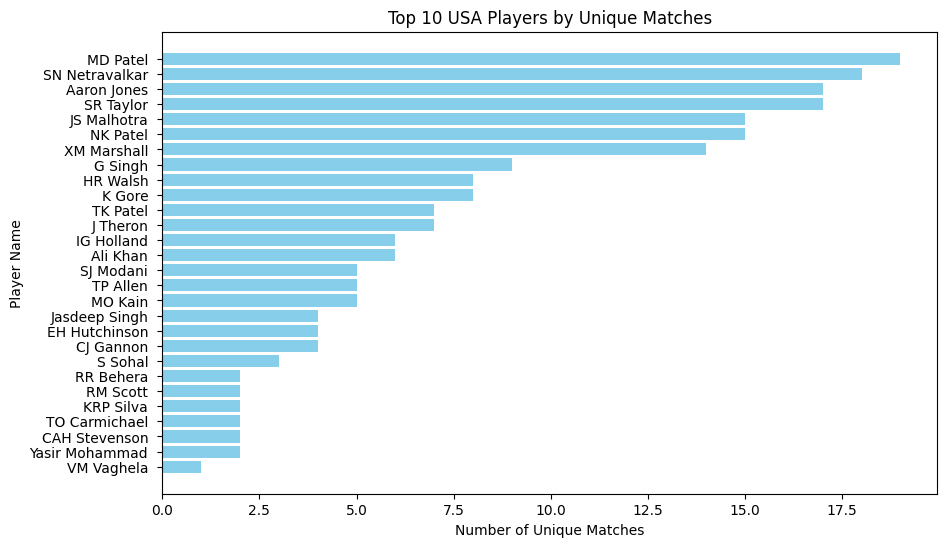

In [64]:
plt.figure(figsize=(10, 6))
plt.barh(USA_players['Player_Name'], USA_players['Match_ID'], color='skyblue')
plt.xlabel('Number of Unique Matches')
plt.ylabel('Player Name')
plt.title('Top 10 USA Players by Unique Matches')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest value at the top
plt.show()

Players with most Runs for USA.

In [65]:
filtered_df = filtered_df[filtered_df['Runs'] != 'DNB']
filtered_df['Runs'] = filtered_df['Runs'].str.replace('*', '', regex=False)
filtered_df['Runs'] = filtered_df['Runs'].astype(int)
grouped_df = filtered_df.groupby('Player_Name')['Runs'].sum()
grouped_df = grouped_df.sort_values(ascending=False)
print(grouped_df)

Player_Name
SR Taylor          540
Aaron Jones        266
JS Malhotra        246
MD Patel           235
XM Marshall        204
G Singh            151
HR Walsh           114
SJ Modani           93
NK Patel            71
MO Kain             71
IG Holland          47
K Gore              47
KRP Silva           32
Jasdeep Singh       31
SN Netravalkar      28
TP Allen            27
S Sohal             23
RM Scott            19
TK Patel            17
EH Hutchinson       16
RR Behera           16
CJ Gannon           12
J Theron             8
CAH Stevenson        5
Ali Khan             0
Yasir Mohammad       0
Name: Runs, dtype: int64


<ipython-input-65-f9e792104888>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Runs'] = filtered_df['Runs'].str.replace('*', '', regex=False)
<ipython-input-65-f9e792104888>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Runs'] = filtered_df['Runs'].astype(int)


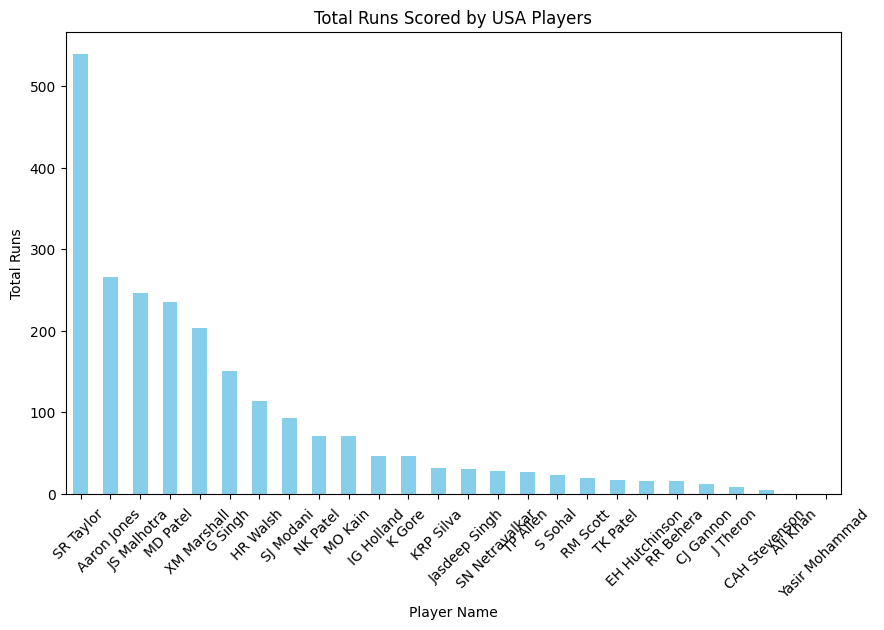

In [66]:
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar', color='skyblue')
plt.xlabel('Player Name')
plt.ylabel('Total Runs')
plt.title('Total Runs Scored by USA Players')
plt.xticks(rotation=45)
plt.show()

Players with Best Strike Rate for USA.

In [74]:
filtered_df = filtered_df[filtered_df['Runs'] != 'DNB']
filtered_df['BF'] = filtered_df['BF'].astype(int)
filtered_df['SR'] = (filtered_df['Runs'] / filtered_df['BF']) * 100
grouped_df = filtered_df.groupby('Player_Name')['SR'].mean()
grouped_df = grouped_df.sort_values(ascending=False)
print(grouped_df)

Player_Name
KRP Silva          248.571429
EH Hutchinson      200.000000
TP Allen           178.518519
CJ Gannon          166.666667
K Gore             153.333333
J Theron           141.666667
SR Taylor          138.177244
SJ Modani          137.929258
MO Kain            133.750000
G Singh            113.449989
JS Malhotra        109.049028
SN Netravalkar     108.452381
MD Patel           107.449000
HR Walsh           104.578589
Aaron Jones        100.258833
RM Scott           100.000000
NK Patel            89.215686
TK Patel            88.888889
XM Marshall         79.854097
S Sohal             72.727273
CAH Stevenson       71.428571
IG Holland          69.973545
Jasdeep Singh       64.583333
RR Behera           34.782609
Ali Khan             0.000000
Yasir Mohammad       0.000000
Name: SR, dtype: float64


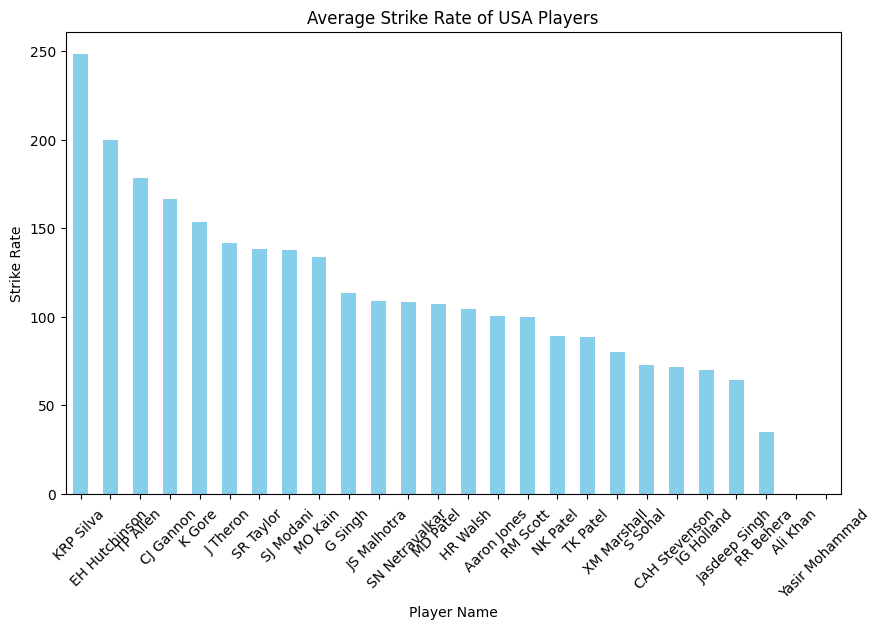

In [75]:
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar', color='skyblue')
plt.xlabel('Player Name')
plt.ylabel('Strike Rate')
plt.title('Average Strike Rate of USA Players')
plt.xticks(rotation=45)
plt.show()